In [48]:
from preamble import *
from preamble import visits, systeminfo

In [50]:
def write_lightcurve_file(filename, mjd, flux, uncertainty, shift):
    """
    Writes a lightcurve data file with the provided columns.
    
    Parameters:
    - filename: The name of the file to write.
    - mjd: Modified Julian Dates (MJD).
    - flux: Normalized flux array
    - uncertainty: Normalized uncertainty array
    - shift: Shift in position values (in pixels)
    """
    with open(filename, 'w') as file:
        # Write the header information
        file.write(f"#AU Mic b WFC3 {visit} {direction}\n")
        file.write("#Date of observation      flux      uncertainty    shift in position\n")
        file.write("#          (MJD)      (normalized)                    (in pixels)\n")
        file.write("#-----------------------------------------------------------------------\n")
        file.write("#          x              y              err       sh\n")
        file.write("#-----------------------------------------------------------------------\n")
        
        # Write the data rows
        for x, y, err, sh in zip(mjd, flux, uncertainty, shift):
            # file.write(f"{float(x):>17.12f}   {float(y):>10.8f}   {float(err):>10.8f}   {float(sh):>10.8f}\n")
            file.write(f"{float(x)}   {float(y)}   {float(err)}   {float(sh)}\n")

def write_wavelength_file(filename, wavelength):
    """
    Writes a wavelength data file with the provided wavelength array.
    
    Parameters:
    - filename: The name of the file to write.
    - wavelength: List of wavelength values (in angstroms).
    """
    with open(filename, 'w') as file:
        # Write the header information
        file.write(f"#AU Mic b WFC3 {visit} {direction}\n")
        file.write("#Wavelength array (angstroms)\n")
        file.write("#-----------------------------------------\n")
        
        # Write the wavelength values
        for wl in wavelength:
            file.write(f"{float(wl):>17.7f}\n")

F21 Forward



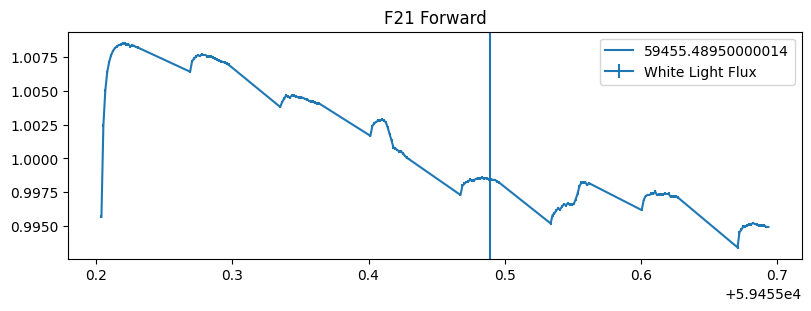

F21 Backward



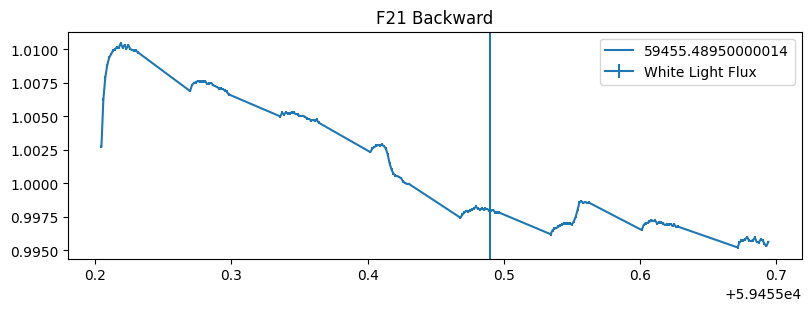

S22 Forward



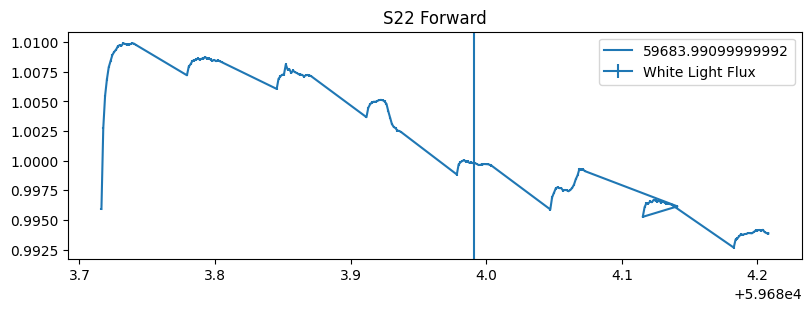

S22 Backward



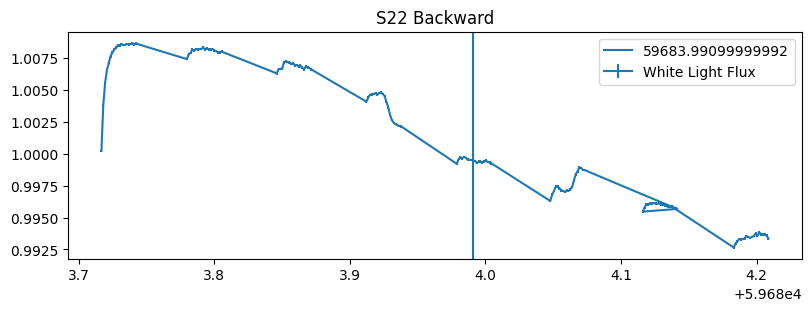

In [100]:
for visit in ['F21','S22']:
        
    for direction in ['Forward','Backward']:

        print(visit, direction)
        print('')

        visit_data = visits[f'{visit}']
        spectral_data = visit_data[f'{direction}']
        predicted_T0 = visits[f'{visit}']['T0 (BJD_TDB)'].value - 2400000.5

        flux = spectral_data['exp_spec']*2.5 # spectrum, in e-
        white_light_flux = np.nansum(flux, axis=0)
        wavelength = list(spectral_data['wavelength'])
        mjd = spectral_data['img_date']
        normalized_flux = white_light_flux/np.nanmedian(white_light_flux)
        shift = spectral_data['sh_exp_cross']

        mjd = mjd.flatten()
        normalized_flux = normalized_flux.flatten()
        relative_err = [100e-6]*len(mjd) # 100 ppm uncertainty
        shift = shift.flatten()

        data_loc = '/Users/wiwa8630/Research/AUMic-WFC3/WFC3-analysis/ExoTiC-ISM/data/'
        data_fname = data_loc+f"{visit}{direction}/AUMicb_{visit}_{direction}_lightcurve_data.txt"
        wave_fname = data_loc+f"{visit}{direction}/AUMicb_{visit}_{direction}_wavelength_data.txt"

        # Write the lightcurve data to a file
        write_lightcurve_file(data_fname,mjd,normalized_flux,relative_err,shift)
        # Write the wavelength data to a separate file
        write_wavelength_file(wave_fname, wavelength)

        plt.figure(figsize=(8,3) )
        plt.title(f'{visit} {direction}')
        plt.axvline(predicted_T0,label=f'{predicted_T0}')
        plt.errorbar(mjd,normalized_flux,yerr=relative_err,label='White Light Flux')
        plt.legend()
        plt.show()